In [3]:
import numpy as np
import pandas as pd
import torch.nn as nn

import matplotlib.pyplot as plt

In [184]:
data = pd.concat([pd.read_csv(f"data/year_sample_data_{n}.csv") for n in range(20)], keys=range(20))# .sort_index().reset_index(drop=True)

In [193]:
data = data.sort_index(kind="mergesort", ignore_index=True, level=1)

In [212]:
data

,# days_offset,sales
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
8395,419,58
8396,419,51
8397,419,57
8398,419,52


In [191]:
# data.sort_values(axis=1,by=1,kind="mergesort")

In [194]:
data.describe()

,# days_offset,sales
count,8400.00000,8400.000000
mean,209.50000,15.538452
std,121.25043,16.055519
min,0.00000,0.000000
25%,104.75000,3.000000
50%,209.50000,9.000000
75%,314.25000,24.000000
max,419.00000,78.000000


In [234]:
data.corr()

,# days_offset,sales
# days_offset,1.000000,0.885398
sales,0.885398,1.000000


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [38]:
data

,# days_offset,sales
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
359,359,37
360,360,37
361,361,26
362,362,35


In [64]:
# data["# days_offset"].values.reshape(-1, 1)

In [57]:
model.fit(X = data["# days_offset"].values.reshape(-1, 1), y=data["sales"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
model.score(data["# days_offset"].values.reshape(-1, 1), data["sales"])

0.784493121467595

In [255]:
X = data["# days_offset"].values.reshape(-1, 1)
y = data["sales"]

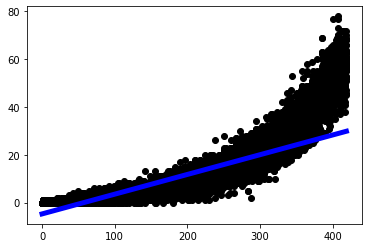

In [124]:
pred = model.predict(X)
plt.scatter(X, y, color="black")
plt.plot(X, pred, color="blue", linewidth=5)

In [153]:
from sklearn.utils import shuffle

In [235]:
def fit_model(X, y, model):
    m = np.random.rand(len(X)) <= 0.8
    model.fit(X[m], y[m])
    print("Score: ", model.score(X[~m], y[~m]))
    pred = model.predict(X[~m])
    return model, pred, m

def plot_model(X, y, model):
    X, y = shuffle(X, y)
    model, p, m = fit_model(X, y, model)
    plt.figure(figsize=(15,10))
    plt.scatter(X[~m], y[~m], color="black", linewidth=1)
    idx = np.argsort(X[~m].flatten())
    plt.plot(X[~m][idx], p[idx], color="blue", linewidth=5)
    return model

In [275]:
def fit_model2(X, y, model, X_t, y_t):
    model.fit(X, y)
    print("Score: ", model.score(X_t, y_t))
    pred = model.predict(X_t)
    return model, pred

def plot_model2(X, y, model):
    X_s, y_s = shuffle(X[:380 * 20], y[:380 * 20])
    model, p = fit_model2(X_s, y_s, model, X[380 * 20:], y[380 * 20:])
    plt.figure(figsize=(15,10))
    plt.scatter(X_s[:380], y_s[:380], color="black", linewidth=1)
    plt.plot(X[380 * 20:], p, color="blue", linewidth=5)
    idx = np.argsort(X_s[:380].flatten())
    plt.scatter(X[380 * 20::30], y[380 * 20::30], color="orange", linewidth=1)
    plt.plot(X_s[:380][idx], model.predict(X_s[:380])[idx])
    return model

Score:  -4.5566346211831945


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

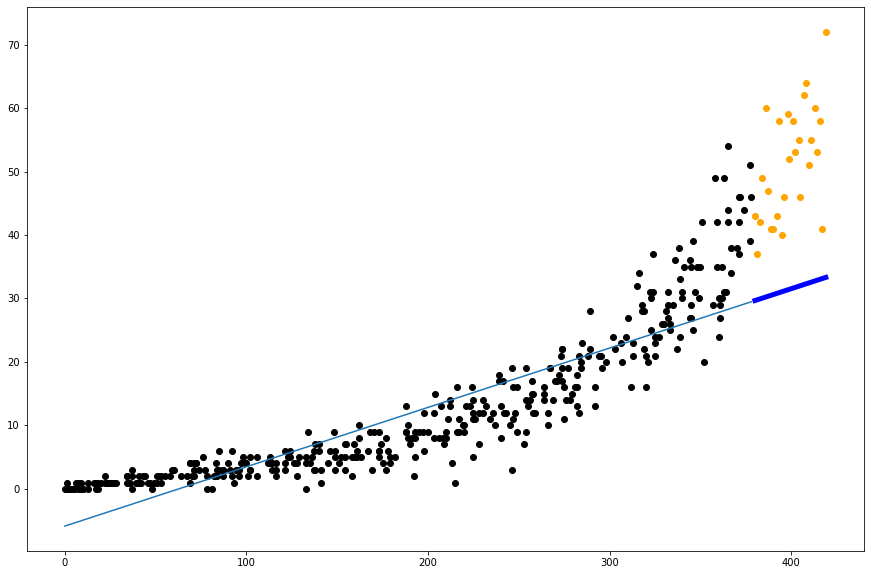

In [276]:
plot_model2(X, y, LinearRegression())

In [127]:
from sklearn import svm

Score:  -1.0050498744860792


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

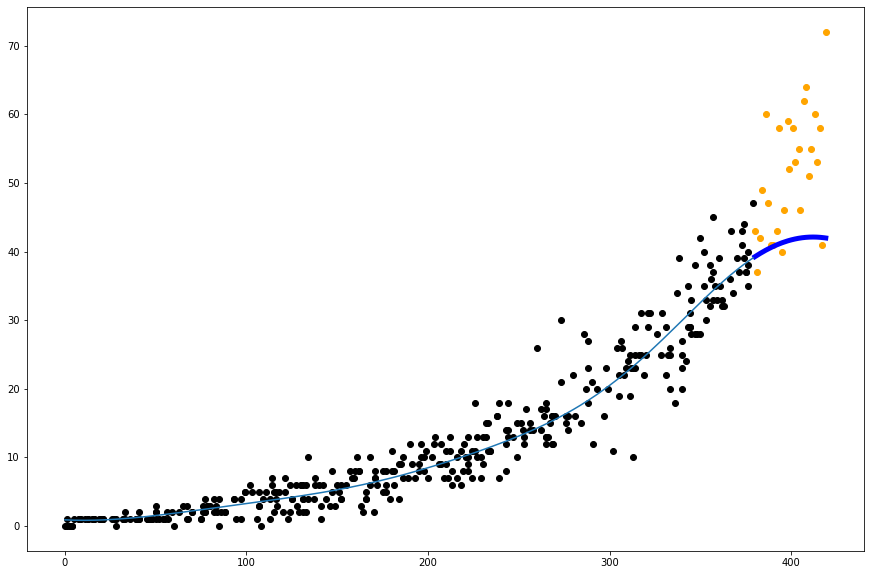

In [277]:
plot_model2(X, y, svm.SVR())

Score:  0.20498427180043133


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

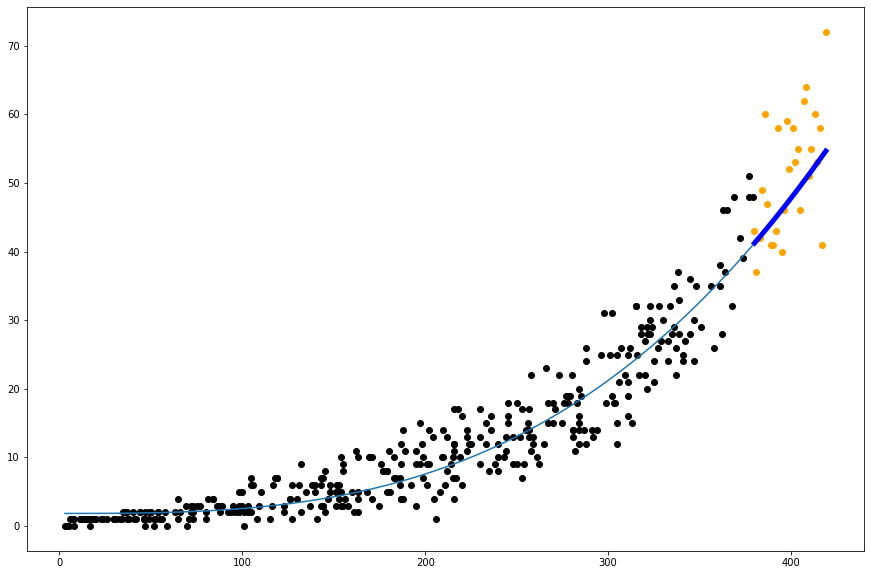

In [283]:
plot_model2(X, y, svm.SVR(kernel="poly"))

Score:  -1.7675505612332945


SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

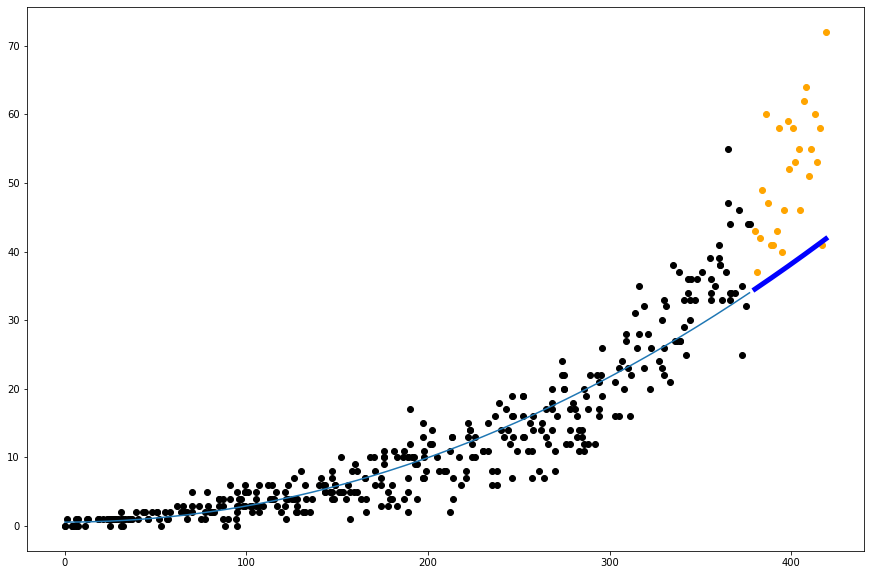

In [278]:
plot_model2(X, y, svm.SVR(kernel="poly",degree=2))

Score:  -0.045400073251651296


SVR(C=1.0, cache_size=200, coef0=0.0, degree=4, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

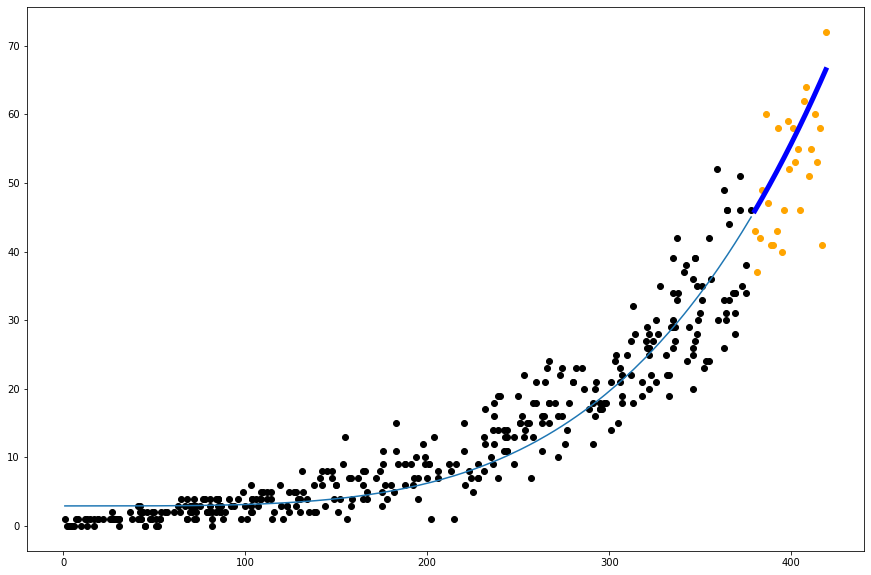

In [280]:
plot_model2(X, y, svm.SVR(kernel="poly",degree=4))

In [144]:
from sklearn import linear_model

Score:  -12.488696139771227


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='huber', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

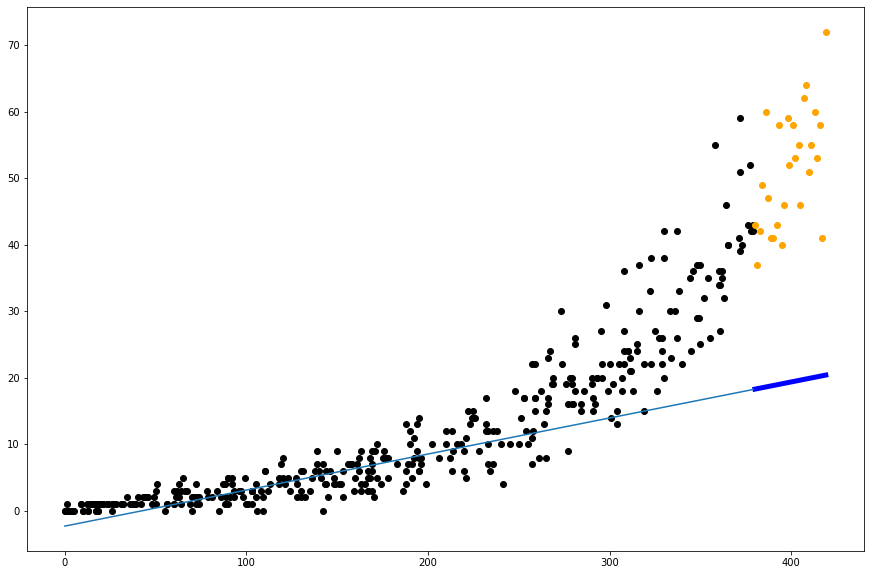

In [279]:
plot_model2(X, y, linear_model.SGDRegressor(loss="huber"))

In [146]:
from sklearn import tree

Score:  -0.13045551918064935


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

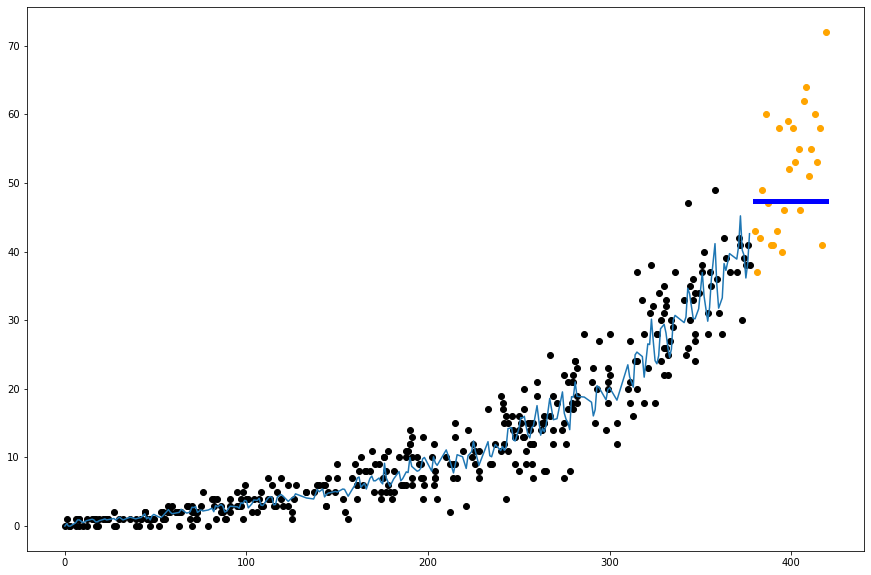

In [281]:
plot_model2(X, y, tree.DecisionTreeRegressor())

In [148]:
m.predict(np.array([15.5, 17.5, 19.5, 370, 450, 850]).reshape(-1, 1))

array([ 1.  ,  0.6 ,  0.8 , 38.9 , 60.95, 60.95])

In [149]:
from sklearn.neural_network import MLPRegressor

Score:  -19.327936568881054


MLPRegressor(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(40, 20, 1), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

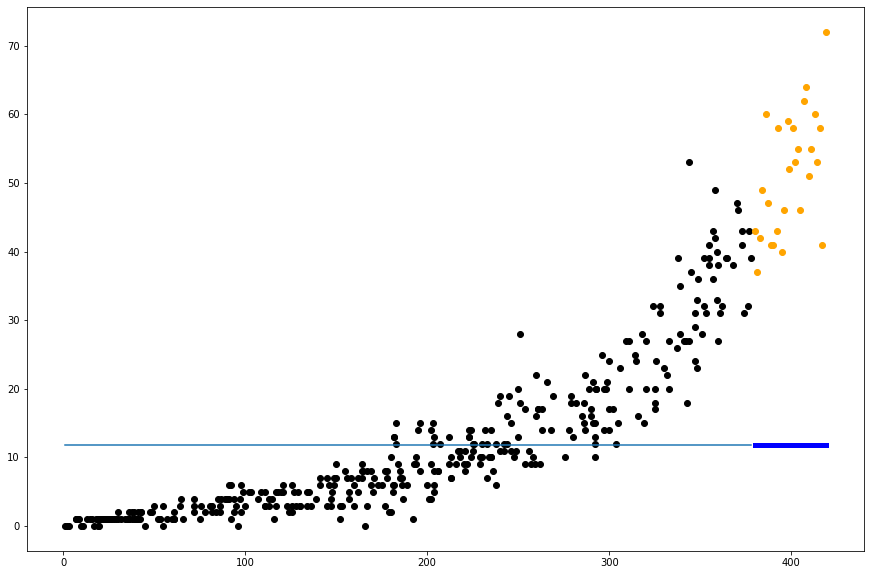

In [282]:
plot_model2(X, y, MLPRegressor(hidden_layer_sizes=(40, 20, 1), max_iter=1000, batch_size=100))